<a href="https://colab.research.google.com/github/Rokibul-Islam-Robi/Machine-Learning-Data-Driven-I-DS424-/blob/main/Ds424_Lab_perfomance_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB PERFORMANCE-01

# Load Data

In [3]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Create Model

In [4]:
from tensorflow.keras import layers

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
# Build model
x = layers.Dense(128) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.3) (x)

x = layers.Dense(64) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(10, activation='softmax', name='output_layer_bn')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_bn_model2')

model.summary()

Model: "mnist_bn_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_bn (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

# Fit Model

In [5]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8447 - loss: 0.5578 - val_accuracy: 0.9637 - val_loss: 0.1223
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9427 - loss: 0.1925 - val_accuracy: 0.9715 - val_loss: 0.0965
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9521 - loss: 0.1539 - val_accuracy: 0.9768 - val_loss: 0.0804
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9607 - loss: 0.1255 - val_accuracy: 0.9780 - val_loss: 0.0765
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9631 - loss: 0.1186 - val_accuracy: 0.9790 - val_loss: 0.0777


# Classification Report

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}, Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0957
Test Accuracy: 0.9768999814987183, Test Loss: 0.07910343259572983


In [7]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.94      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Plotting

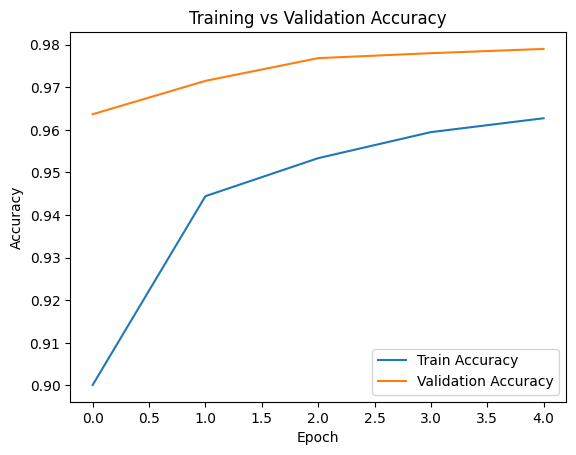

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

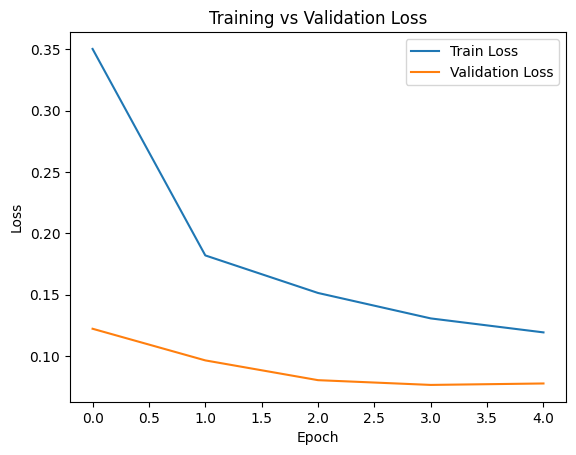

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

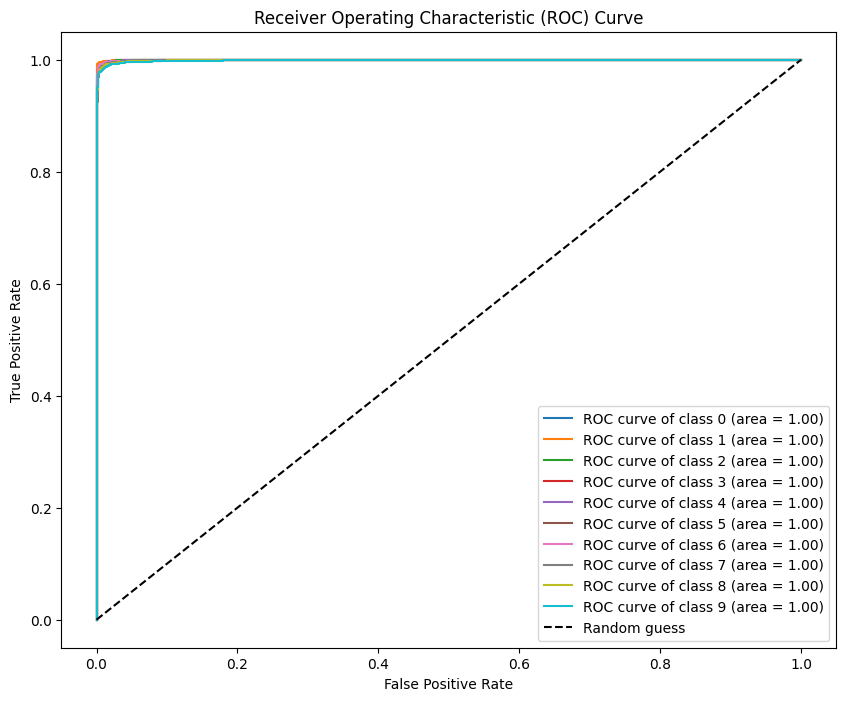

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
n_classes = 10
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Save Model

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Save the model to Google Drive
save_path = '/content/drive/MyDrive/performance_model.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

 Model saved successfully to /content/drive/MyDrive/performance_model.keras


# Restore Model

In [13]:
load_path = '/content/drive/MyDrive/performance_model.keras'
restored_model = keras.models.load_model(load_path)
print(f'Model loaded successfully from {load_path}')

Model loaded successfully from /content/drive/MyDrive/performance_model.keras


# Use Keras Applications

# Data Set

In [14]:
(x2_train, y2_train), (x2_test, y2_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


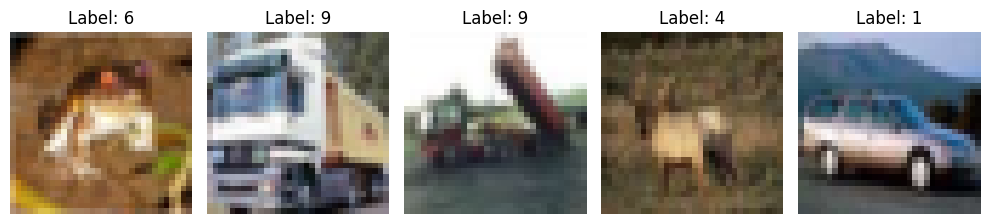

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 10))
axes = axes.flatten()
for i in range(5):
    img = x2_train[i]
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"Label: {y2_train[i][0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Model

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

x2_train = x2_train.astype('float32') / 255.0
x2_test = x2_test.astype('float32') / 255.0

inputs = keras.Input(shape=(32, 32, 3), name='input_layer')

In [17]:
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet50",
)

x = base_model.output

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.5)(x)

num_classes = 10
predictions = keras.layers.Dense(num_classes, activation="softmax")(x)


model2 = keras.Model(inputs=base_model.input, outputs=predictions)





94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Model Training

In [18]:
model2.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history_2 = model2.fit(x2_train, y2_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 102s 44ms/step - accuracy: 0.2307 - loss: 2.8243 - val_accuracy: 0.3394 - val_loss: 3.8767
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.3863 - loss: 1.9773 - val_accuracy: 0.4894 - val_loss: 1.8182
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.5351 - loss: 1.3835 - val_accuracy: 0.5218 - val_loss: 1.9087
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.5965 - loss: 1.2329 - val_accuracy: 0.5326 - val_loss: 1.7109
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.6405 - loss: 1.1250 - val_accuracy: 0.3618 - val_loss: 2.2864
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.6566 - loss: 1.0904 - val_accuracy: 0.6254 - val_loss: 1.3061
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.6684 - loss: 1.0604 - val_accuracy: 0.5176 - val_loss: 2.0971
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy:

# Save Model

In [19]:
save_path_model2 = '/content/drive/MyDrive/cifar10_resnet50_model_final.keras'
model2.save(save_path_model2)
print(f'Model2 saved successfully to {save_path_model2}')

Model2 saved successfully to /content/drive/MyDrive/cifar10_resnet50_model_final.keras


# Classification Report

In [20]:
test_loss_2, test_acc_2 = model2.evaluate(x2_test, y2_test)
print(f'Test Accuracy: {test_acc_2}, Test Loss: {test_loss_2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7492 - loss: 50.4998
Test Accuracy: 0.7461000084877014, Test Loss: 48.41871643066406


In [21]:
from sklearn.metrics import classification_report
import numpy as np

y2_pred = model2.predict(x2_test)
y2_pred_classes = np.argmax(y2_pred, axis=1)

report2 = classification_report(y2_test, y2_pred_classes)
print(report2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.90      0.84      0.87      1000
           2       0.76      0.65      0.70      1000
           3       0.63      0.53      0.58      1000
           4       0.78      0.74      0.76      1000
           5       0.68      0.64      0.66      1000
           6       0.72      0.72      0.72      1000
           7       0.79      0.85      0.82      1000
           8       0.72      0.87      0.79      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



# Plotting

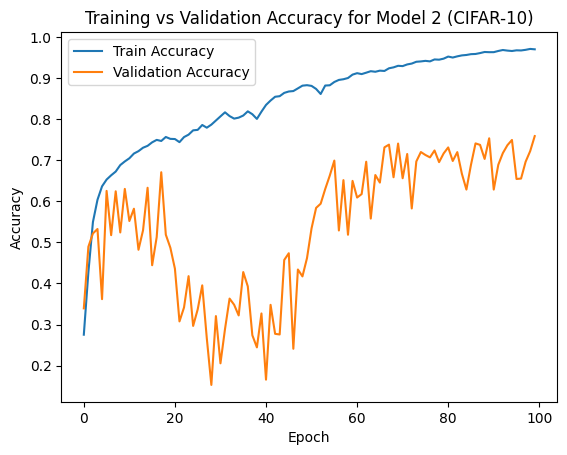

In [22]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy for Model 2 (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

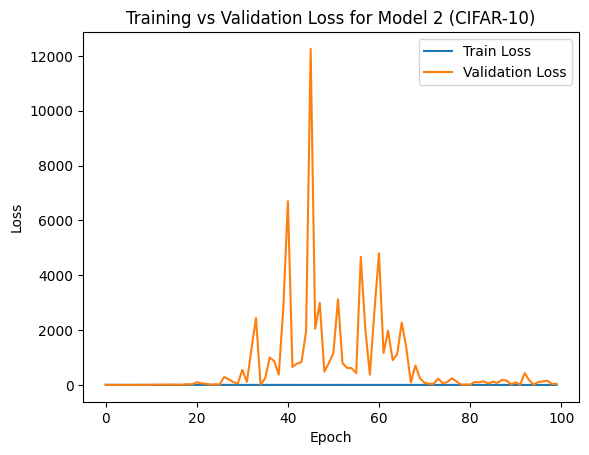

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss for Model 2 (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

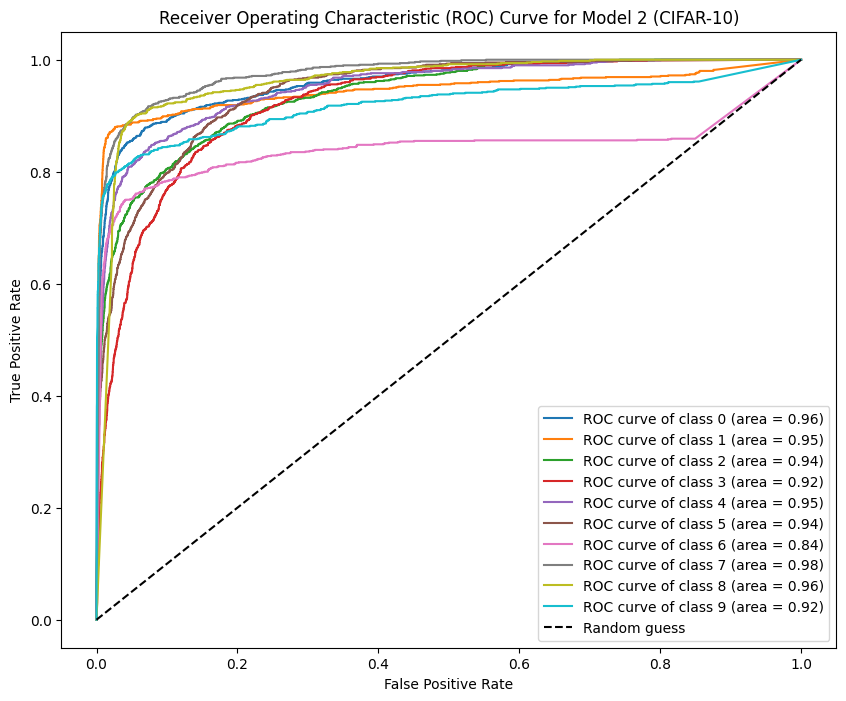

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
n_classes = 10
y_test_binarized = label_binarize(y2_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y2_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model 2 (CIFAR-10)')
plt.legend()
plt.show()

# Restore Model

In [25]:
load_path_model2 = '/content/drive/MyDrive/cifar10_resnet50_model_final.keras'
restored_model = keras.models.load_model(load_path_model2)
print(f'Model loaded successfully from {load_path_model2}')

Model loaded successfully from /content/drive/MyDrive/cifar10_resnet50_model_final.keras
